In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import tensorflow as tf
print(tf.__version__)

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

plt.style.use('fivethirtyeight')

2.2.0


## Purpose of this notebook:
Build a very simple model to measure performance increase.


### Data import

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, 
                                                             zoom_range=0.2,
                                                             rescale=1./225)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)

train_data = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
val_data = val_datagen.flow_from_directory('../data/chest_xray/val/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
test_data = test_datagen.flow_from_directory('../data/chest_xray/test/',
                                             target_size=(100,100),
                                             batch_size=32,
                                             class_mode='binary',
                                             color_mode='grayscale')

Found 2568 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

### Model Parameters:
- Layers:
 - Flatten layer
 - Dense layer with 85 nodes and ReLU activation
 - Output layer
- Optimizer: Adam
- Loss: binary crossentropy

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(100,100,1)))
model.add(Dense(units=85, 
                activation='relu'))
model.add(Dense(units=1, 
                activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

### Fit model
- Trained for 10 epochs
- Number of steps is set equal to the length of the data generator which means it will run through the entire data folder at each epoch.

In [6]:
history = model.fit(train_data, 
                    epochs=10, 
                    validation_data=(val_data), 
                    steps_per_epoch=len(train_data), 
                    validation_steps=len(val_data))

Epoch 1/10
81/81 [==============================] - 108s 1s/step - loss: 0.9015 - accuracy: 0.5670 - precision: 0.5705 - recall: 0.9130 - val_loss: 0.5759 - val_accuracy: 0.7618 - val_precision: 0.7482 - val_recall: 0.9298
Epoch 2/10
81/81 [==============================] - 57s 709ms/step - loss: 0.5661 - accuracy: 0.7481 - precision: 0.7075 - recall: 0.9366 - val_loss: 0.4876 - val_accuracy: 0.7945 - val_precision: 0.7847 - val_recall: 0.9242
Epoch 3/10
81/81 [==============================] - 57s 709ms/step - loss: 0.5246 - accuracy: 0.7714 - precision: 0.7402 - recall: 0.9109 - val_loss: 0.4920 - val_accuracy: 0.8345 - val_precision: 0.8879 - val_recall: 0.8382
Epoch 4/10
81/81 [==============================] - 57s 708ms/step - loss: 0.5087 - accuracy: 0.7956 - precision: 0.7914 - recall: 0.8614 - val_loss: 0.4276 - val_accuracy: 0.8727 - val_precision: 0.9054 - val_recall: 0.8952
Epoch 5/10
81/81 [==============================] - 57s 707ms/step - loss: 0.4720 - accuracy: 0.8228 -

## Evaluation on holdout

In [17]:
acc = model.evaluate(test_data, steps=len(test_data), verbose=1)
list(zip(model.metrics_names, acc))

20/20 [==============================] - 7s 336ms/step - loss: 0.4257 - accuracy: 0.8269 - precision: 0.8279 - recall: 0.9128


[('loss', 0.42572668194770813),
 ('accuracy', 0.8269230723381042),
 ('precision', 0.8279069662094116),
 ('recall', 0.9128205180168152)]

### Create test set array
This makes it easier to create a confusion matrix.
Run both lines to get the full test data.

In [18]:
# first iteration resets test generator
first_batch = test_data.next()
data_list = first_batch[0]
batch_index = 0
class_list = first_batch[1]
while batch_index <= test_data.batch_index:
    data = test_data.next()
    print(data[0].shape)
    data_list=np.concatenate((data_list, data[0]))
    class_list=np.concatenate((class_list, data[1]))
    batch_index = batch_index + 1
data_array = np.asarray(data_list)
data_array.shape

# Second iteration creates full list
first_batch = test_data.next()
data_list = first_batch[0]
batch_index = 0
class_list = first_batch[1]
while batch_index <= test_data.batch_index:
    data = test_data.next()
    print(data[0].shape)
    data_list=np.concatenate((data_list, data[0]))
    class_list=np.concatenate((class_list, data[1]))
    batch_index = batch_index + 1
data_array = np.asarray(data_list)
data_array.shape

(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(16, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(16, 100, 100, 1)


(624, 100, 100, 1)

In [19]:
y_hat = model.predict_classes(data_array)
y_true = class_list

In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat, target_names=['NORMAL', 'PNEUMONIA']))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

              precision    recall  f1-score   support

      NORMAL       0.82      0.68      0.75       234
   PNEUMONIA       0.83      0.91      0.87       390

    accuracy                           0.83       624
   macro avg       0.83      0.80      0.81       624
weighted avg       0.83      0.83      0.82       624

Accurancy:  0.8269230769230769


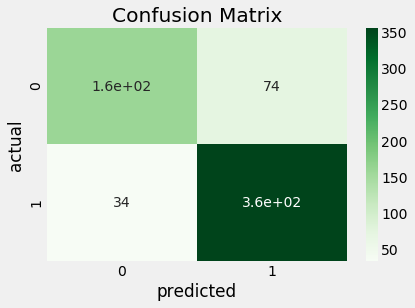

In [21]:
evaluation(y_true, y_hat)

In [22]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

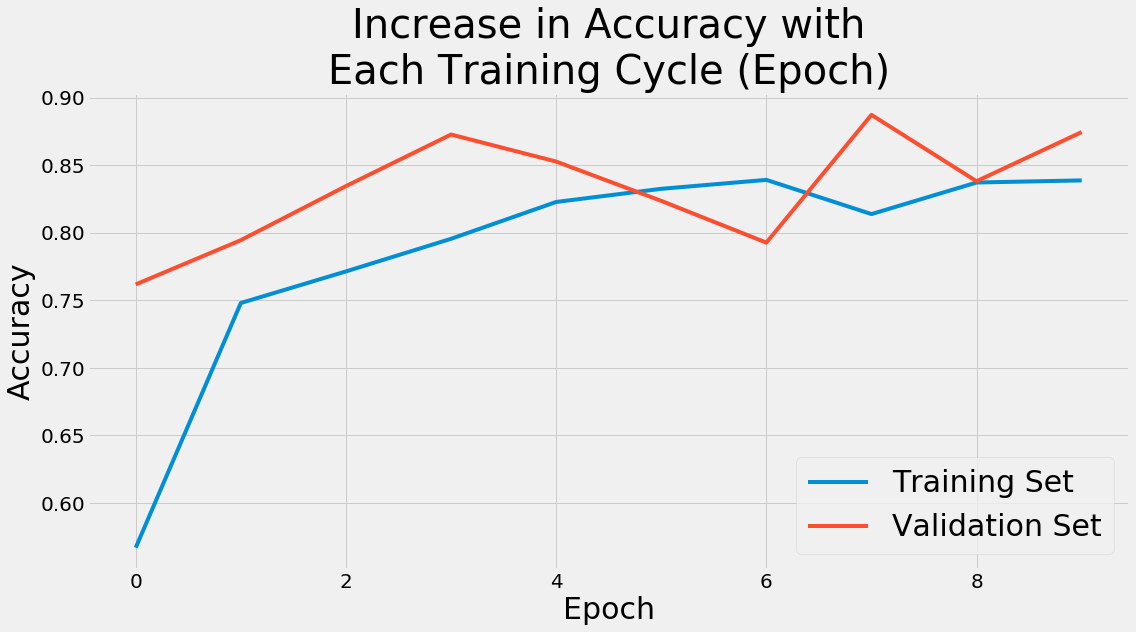

In [23]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax, label='Training Set')
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

# plt.savefig('accuracy_with_val.png', transparency=True) # uncomment to save image

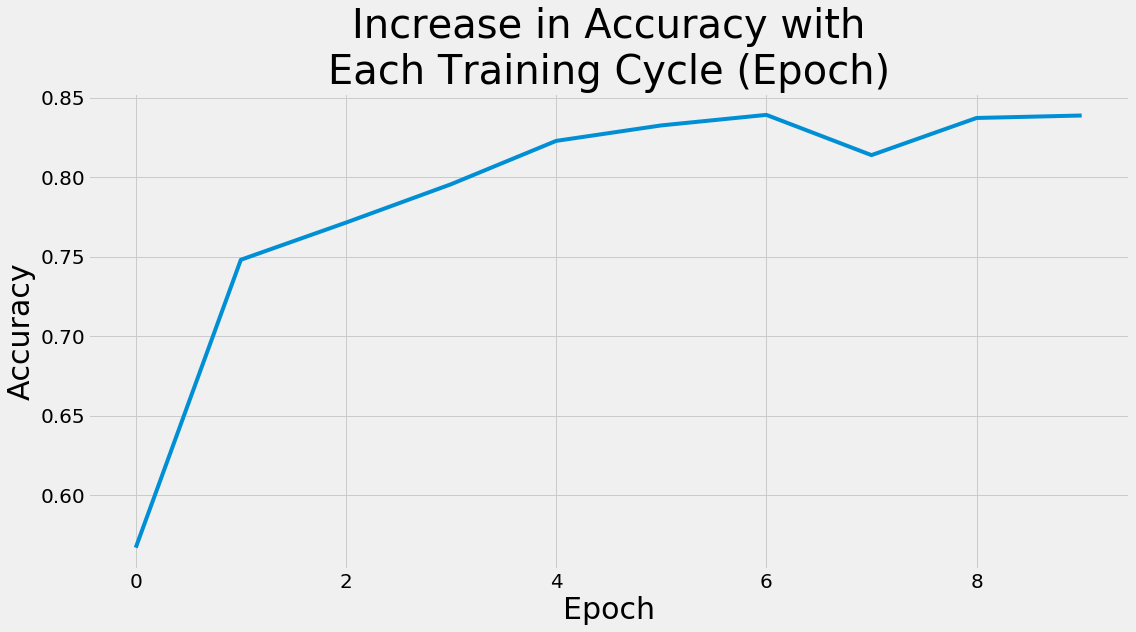

In [24]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

# plt.savefig('accuracy.png', transparency=True) # uncomment to save image

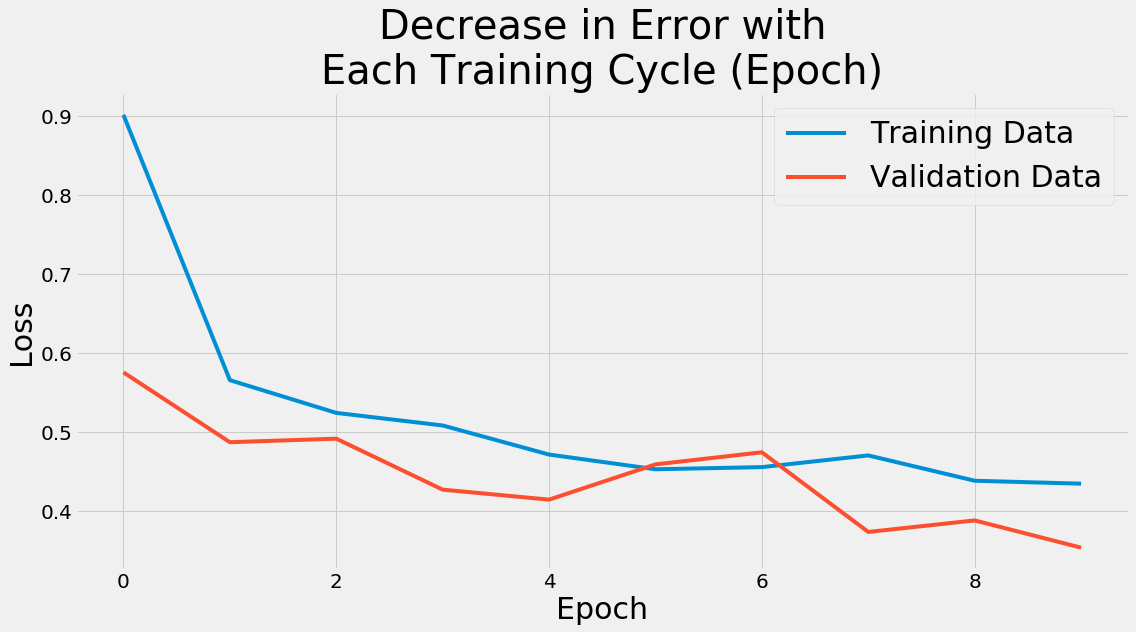

In [25]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax, label='Training Data')

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

# plt.savefig('loss_with_val.png', transparency=True) # uncomment to save image

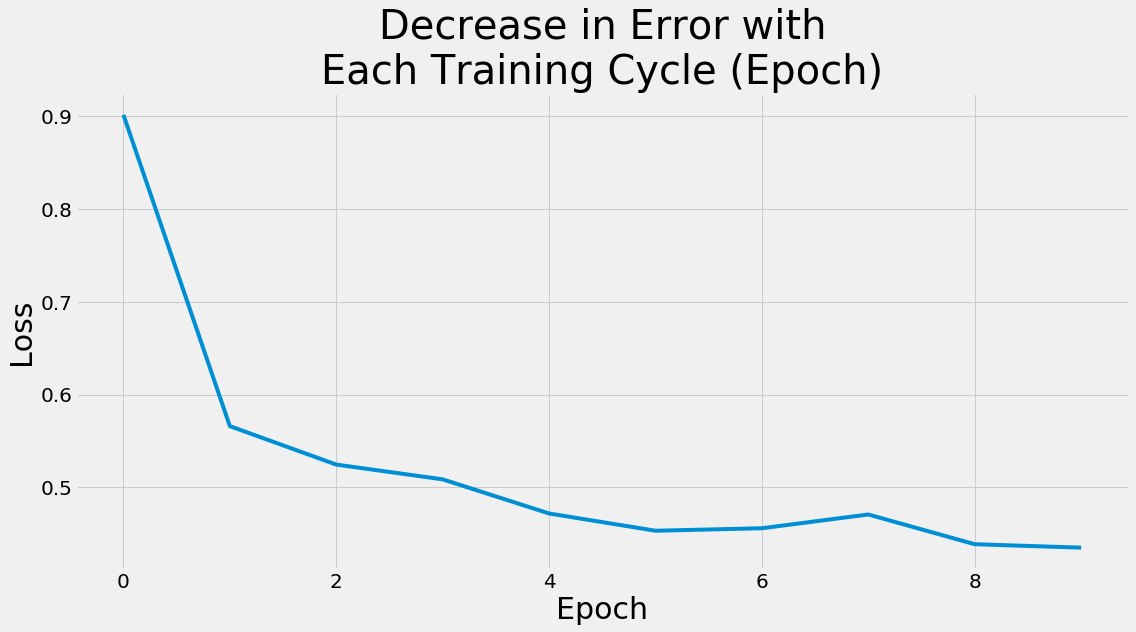

In [26]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax)

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

# plt.savefig('loss.png', transparency=True) # uncomment to save image